['Network Size' 'Run Index' 'Test' 'Name' 'Succ' 'Fail' 'Send Rate (tps)'
 'Max Latency (s)' 'Min Latency (s)' 'Avg Latency (s)' 'Throughput (tps)'
 'Stale Block Rate' 'Num Blocks' 'Num Txns' 'Round Duration'
 'My Throughput' 'Avg Interval' 'Min Interval' 'Max Interval'
 'PercentDiff on TPS']


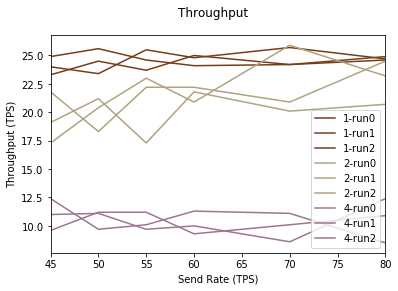

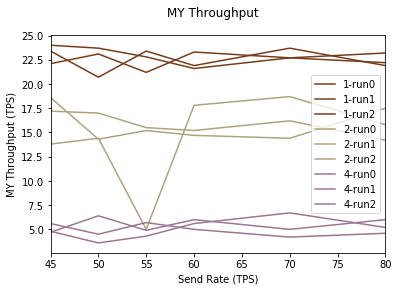

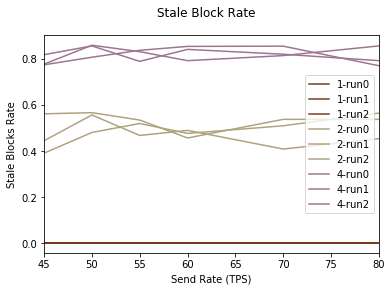

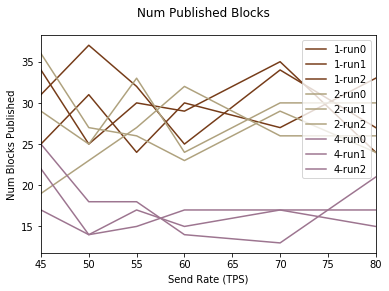

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os

DATA = "./results/performance_summary.csv"
df = pd.read_csv(DATA)
print(df.columns.values)

netsizes = list(df["Network Size"].unique())
repeats = df["Run Index"].unique()
number_of_colors = len(netsizes)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

# plot Throughput
fig1, ax1 = plt.subplots()
fig1.suptitle("Throughput")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        subset.plot(x="Send Rate (tps)", y="Throughput (tps)", ax=ax1, label=str(size)+"-run"+str(run), color=color)
ax1.set(xlabel="Send Rate (TPS)", ylabel="Throughput (TPS)")


# plot MY Throughput
fig2, ax2 = plt.subplots()
fig2.suptitle("MY Throughput")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        subset.plot(x="Send Rate (tps)", y="My Throughput", ax=ax2, label=str(size)+"-run"+str(run), color=color)
ax2.set(xlabel="Send Rate (TPS)", ylabel="MY Throughput (TPS)")

# plot Stale Block Rate
fig3, ax3 = plt.subplots()
fig3.suptitle("Stale Block Rate")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        subset.plot(x="Send Rate (tps)", y="Stale Block Rate", ax=ax3, label=str(size)+"-run"+str(run), color=color)
ax3.set(xlabel="Send Rate (TPS)", ylabel="Stale Blocks Rate")

# plot Num Blocks published
fig4, ax4 = plt.subplots()
fig4.suptitle("Num Published Blocks")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        subset.plot(x="Send Rate (tps)", y="Num Blocks", ax=ax4, label=str(size)+"-run"+str(run), color=color)
ax4.set(xlabel="Send Rate (TPS)", ylabel="Num Blocks Published")
#fig = ax.get_figure()
#fig.savefig("/Users/amiecorso/Desktop/exp1-" + str(netsize) + ".pdf")

plt.show()
